# Experiment Task for MLFlow


In [1]:
import pandas as pd
import numpy as np
import pickle


In [2]:
# cr = pd.read_csv('quikr_car.txt')
# cr.to_csv('quikr_car.csv', index = None)

car = pd.read_csv("quikr_car.csv")
car.head()


,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [3]:
car.shape

car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


# **Cleaning**

1. Name is not in a catogorical data
2. Company should be a string
3. year needs to be in int not a string
4. price needs to be in int not a strings
5. kms_driven should be int not a string, nan
6. fuel_type has NAN


In [4]:
car['fuel_type'].unique()


array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

# **cleaning**

In [5]:
backup = car.copy()

In [6]:
car['name'] = car['name'].str.split(' ').str.slice(0, 3).str.join(' ')

car = car[car['year'].str.isnumeric()]
car['year'] = car['year'].astype(int)

car = car[car['Price'] != 'Ask For Price']
car['Price'] = car['Price'].str.replace(',', '').astype(int)

car['kms_driven'] = car['kms_driven'].str.split(' ').str.get(0).str.replace(',', '')
car = car[car['kms_driven'].str.isnumeric()]
car['kms_driven'] = car['kms_driven'].astype(int)

car = car[~car['fuel_type'].isna()]

car = car.reset_index(drop= True)
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [7]:
car.describe()


,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [8]:
car = car[car['Price'] < 6e6]


In [9]:
car.to_csv('Cleaned_data.csv')

# **Model Building**

In [10]:
x = car.drop(columns = ['Price'])
y = car['Price']

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import  make_column_transformer
from sklearn.pipeline import make_pipeline

In [13]:
ohe = OneHotEncoder()
ohe.fit(x[['name', 'company', 'fuel_type']])
col_tranf = make_column_transformer((OneHotEncoder(categories = ohe.categories_), ['name', 'company', 'fuel_type']), remainder = 'passthrough')
pipe = make_pipeline(col_tranf, LinearRegression())
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [14]:
y_preds = pipe.predict(x_test)
r2_score(y_test, y_preds)


0.5997280661980305

In [15]:
score = []

for i in range(1000):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = i)
  lr = LinearRegression()
  pipe = make_pipeline(col_tranf, lr)
  pipe.fit(x_train, y_train)
  y_pred = pipe.predict(x_test)
  score.append(r2_score(y_test, y_pred))

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = np.argmax(score))
lr = LinearRegression()
pipe = make_pipeline(col_tranf, lr)
pipe.fit(x_train, y_train)
y_preds = pipe.predict(x_test)
r2_score(y_test, y_preds)

0.8457059012561223

# Tracking using MLFlow

In [17]:
import mlflow
import os

In [18]:
mlflow.set_experiment("car_prediction")

2023/10/19 20:30:52 INFO mlflow.tracking.fluent: Experiment with name 'car_prediction' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///C:/Users/Mohammd%20Muzammil/Documents/GitHub/mlflow/mlruns/573777646604742202', creation_time=1697727652608, experiment_id='573777646604742202', last_update_time=1697727652608, lifecycle_stage='active', name='car_prediction', tags={}>

In [19]:
with mlflow.start_run():
  lr = LinearRegression()
  pipe = make_pipeline(col_tranf, lr)
  pipe.fit(x_train, y_train)

  # capture the metrics
  preds = pipe.predict(x_test)
  val_acc = r2_score(preds, y_test)

  #capture the training
  pred_train = pipe.predict(x_train)
  train_acc = r2_score(pred_train, y_train)

  mlflow.set_tag('mlflow.runName', 'first_run')
  mlflow.log_param('max_depth', 4)
  mlflow.log_metric('val-acc', val_acc)
  mlflow.log_metric('train_acc', train_acc)

  mlflow.sklearn.log_model(pipe, 'model')


# Hyperparameter Tuning with MLFlow

In [25]:
def track_exp(n_jobs, i):

    with mlflow.start_run():
        #training model

        lr = LinearRegression(n_jobs = n_jobs)
        pipe = make_pipeline(col_tranf, lr)
        pipe.fit(x_train, y_train)

        # capture the metrics
        preds = pipe.predict(x_test)
        val_acc = r2_score(preds, y_test)
        
        #capture the training
        pred_train = pipe.predict(x_train)
        train_acc = r2_score(pred_train, y_train)

        run_name = f"Hyperparameter Tuning {i}"

        mlflow.set_tag('mlflow.runName', run_name)
        mlflow.log_param('n_jobs', n_jobs)
        mlflow.log_param('max_depth', 4)
        mlflow.log_metric('val-acc', val_acc)
        mlflow.log_metric('train_acc', train_acc)

        mlflow.sklearn.log_model(pipe, 'model')

    

In [26]:
track_exp(5, 1)
track_exp(4, 2)
track_exp(3, 3)
track_exp(2, 4)
track_exp(1, 5)

C:\Users\Mohammd Muzammil\AppData\Local\Programs\Python\Python311\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\Mohammd Muzammil\AppData\Local\Programs\Python\Python311\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
C:\Users\Mohammd Muzammil\AppData\Local\Programs\Python\Python311\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules

# Trying a diff model

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

C:\Users\Mohammd Muzammil\AppData\Local\Programs\Python\Python311\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\Mohammd Muzammil\AppData\Local\Programs\Python\Python311\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


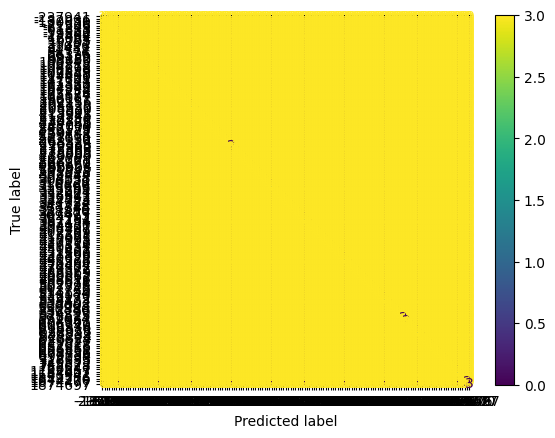

In [67]:
with mlflow.start_run():
        #training model

        lr = LinearRegression()
        pipe = make_pipeline(col_tranf, lr)
        pipe.fit(x_train, y_train)

        # capture the metrics
        pred_test = pipe.predict(x_test)
        pred_test = pred_test.reshape(-1, 1)
        preds = [int(i[0]) for i in pred_test]
        
    
        val_acc = r2_score(preds, y_test)
        
        #capture the training
        pred_train = pipe.predict(x_train)
        train_acc = r2_score(pred_train, y_train)

        run_name = f"Hyperparameter Tuning Model"

        mlflow.set_tag('mlflow.runName', run_name)
        mlflow.log_param('max_depth', 4)
        mlflow.log_metric('val-acc', val_acc)
        mlflow.log_metric('train_acc', train_acc)

        cm = ConfusionMatrixDisplay.from_predictions(preds, preds)
        cm.figure_.savefig('confusion_mat.png')
        mlflow.log_artifact('confusion_mat.png')
    
    
        mlflow.sklearn.log_model(pipe, 'model')
